In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
January = pd.read_csv('/Users/yanaprynik/Work_doc/PROJECT5/J2017.csv')
February = pd.read_csv('/Users/yanaprynik/Work_doc/PROJECT5/F2017.csv')
March = pd.read_csv('/Users/yanaprynik/Work_doc/PROJECT5/M2017.csv')
April = pd.read_csv('/Users/yanaprynik/Work_doc/PROJECT5/A2017.csv')

In [3]:
January.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163110 entries, 0 to 1163109
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fullVisitorId      1163110 non-null  uint64 
 1   date               1163110 non-null  int64  
 2   campaign           1163110 non-null  object 
 3   keyword            62958 non-null    object 
 4   medium             1163110 non-null  object 
 5   source             1163110 non-null  object 
 6   browser            1163110 non-null  object 
 7   deviceCategory     1163110 non-null  object 
 8   continent          1163110 non-null  object 
 9   country            1163110 non-null  object 
 10  pagePath           1163110 non-null  object 
 11  transactionId      4328 non-null     object 
 12  productRevenue     2143 non-null     float64
 13  productQuantity    15142 non-null    float64
 14  productPrice       1163110 non-null  int64  
 15  v2ProductCategory  1163110 non-n

In [4]:
data = January.append([February,March,April], sort=False)

/var/folders/cn/scf3zm9942105gh6p3bt09_00000gn/T/ipykernel_78175/2788497097.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = January.append([February,March,April], sort=False)


In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

data = data.rename(columns={'fullVisitorId':'id',
               'deviceCategory':'device',
               'productRevenue': 'revenue',
               'productQuantity': 'quantity',
               'productPrice': 'price',
               'v2ProductCategory': 'product_category',
               'v2ProductName': 'product_name'})

data['price'] = data['price'].apply(lambda x: np.power(x, 1/4))
data['revenue'] = data['revenue'].apply(lambda x: np.power(x, 1/4))

In [6]:
data.head(15)

,id,date,campaign,keyword,medium,source,browser,device,continent,country,pagePath,transactionId,revenue,quantity,price,product_category,product_name
0,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,41.583189,(not set),Four Color Retractable Pen
1,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,31.543421,(not set),Maze Pen
2,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,33.437015,(not set),Retractable Ballpoint Pen Red
3,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,70.703606,(not set),20 oz Stainless Steel Insulated Tumbler
4,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,37.558935,(not set),Google Ballpoint Pen Black
5,452840698089013534,2017-01-29,(not set),NaN,(none),(direct),Safari,mobile,Europe,United Kingdom,/google+redesign/electronics/audio,NaN,NaN,NaN,57.577052,Home/Electronics/Audio/,Metal Earbuds with Small Zipper Case
6,452840698089013534,2017-01-29,(not set),NaN,(none),(direct),Safari,mobile,Europe,United Kingdom,/google+redesign/electronics/audio,NaN,NaN,NaN,79.522102,Home/Electronics/Audio/,Micro Wireless Earbud
7,452840698089013534,2017-01-29,(not set),NaN,(none),(direct),Safari,mobile,Europe,United Kingdom,/google+redesign/electronics/audio,NaN,NaN,NaN,88.007506,Home/Electronics/Audio/,Google Bongo Cupholder Bluetooth Speaker
8,4182031616640256944,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/google+redesign/electronics/audio,NaN,NaN,NaN,76.910562,Home/Electronics/Audio/,Google Water Resistant Bluetooth Speaker
9,4182031616640256944,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/google+redesign/electronics/audio,NaN,NaN,NaN,93.671738,Home/Electronics/Audio/,Google Bluetooth Speaker-Power Bank


/var/folders/cn/scf3zm9942105gh6p3bt09_00000gn/T/ipykernel_78175/1638839294.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(grouped_medium.index, rotation=90)
/var/folders/cn/scf3zm9942105gh6p3bt09_00000gn/T/ipykernel_78175/1638839294.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(grouped_source.index, rotation=90)
/var/folders/cn/scf3zm9942105gh6p3bt09_00000gn/T/ipykernel_78175/1638839294.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 2].set_xticklabels(grouped_browser.index, rotation=90)
/var/folders/cn/scf3zm9942105gh6p3bt09_00000gn/T/ipykernel_78175/1638839294.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(grouped_device.index, rotation=90)
/var/folders/cn/scf3zm9942105gh6p3bt09_00000gn/T/ipykernel_78175/1638839294.py:29: UserWarning: FixedFormatter 

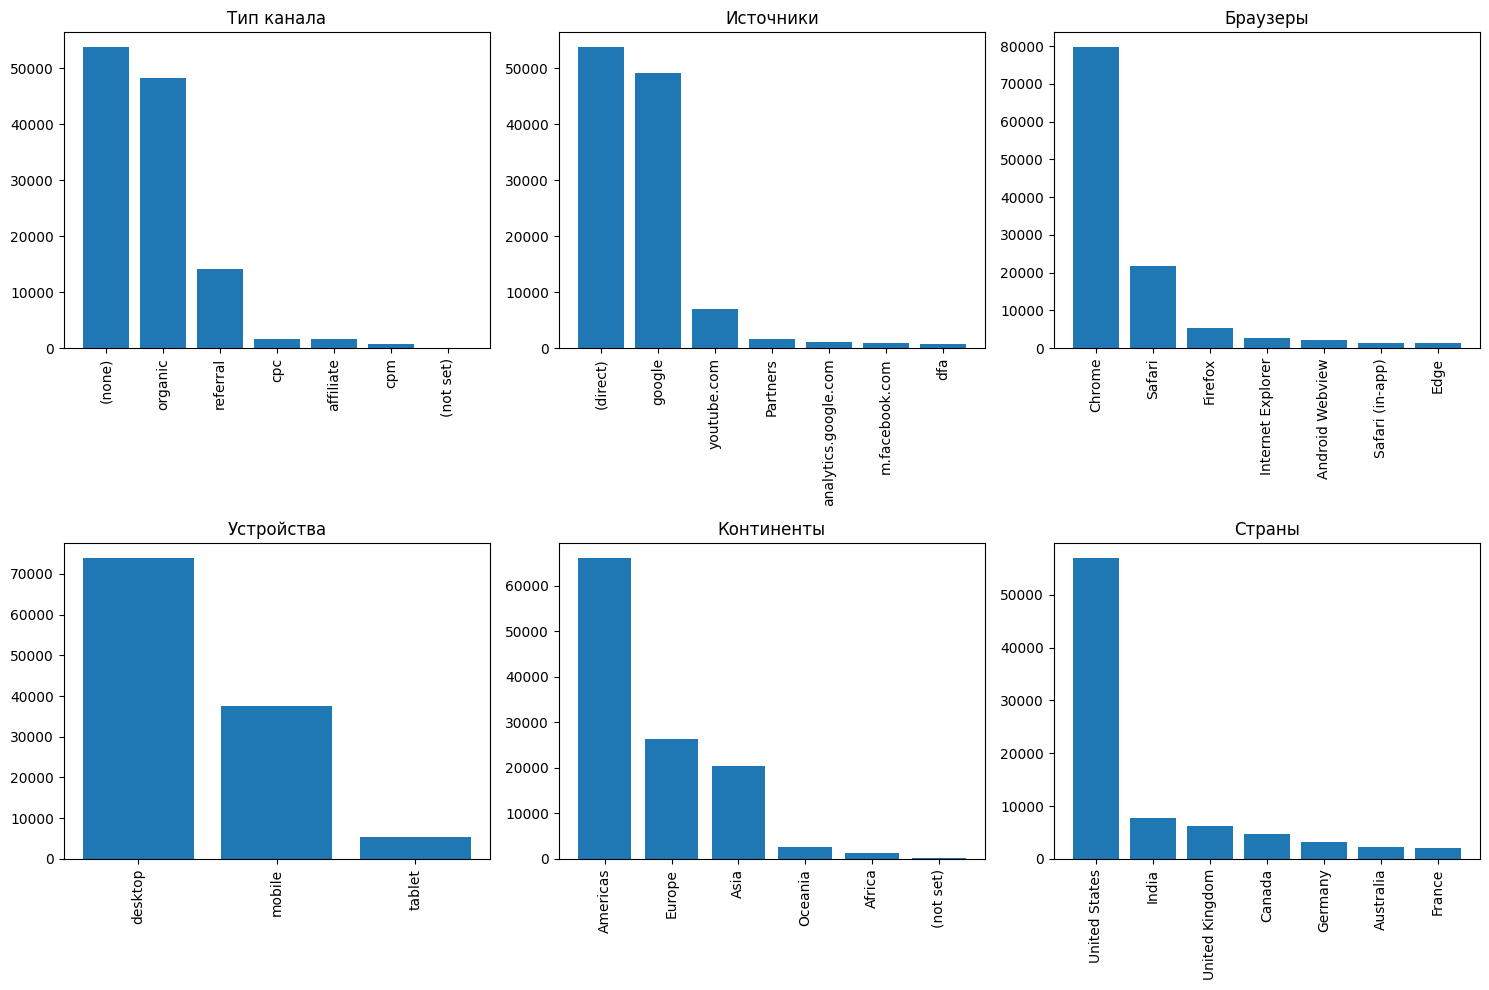

In [7]:
grouped_medium = data.groupby(['medium'])['id'].nunique().sort_values(ascending=False)
grouped_source = data.groupby(['source'])['id'].nunique().sort_values(ascending=False).nlargest(7)
grouped_browser = data.groupby(['browser'])['id'].nunique().sort_values(ascending=False).nlargest(7)
grouped_device = data.groupby(['device'])['id'].nunique().sort_values(ascending=False)
grouped_continent = data.groupby(['continent'])['id'].nunique().sort_values(ascending=False)
grouped_country = data.groupby(['country'])['id'].nunique().sort_values(ascending=False).nlargest(7)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0, 0].bar(grouped_medium.index, grouped_medium)
axes[0, 0].set_title('Тип канала')
axes[0, 0].set_xticklabels(grouped_medium.index, rotation=90)

axes[0, 1].bar(grouped_source.index, grouped_source)
axes[0, 1].set_title('Источники')
axes[0, 1].set_xticklabels(grouped_source.index, rotation=90)

axes[0, 2].bar(grouped_browser.index, grouped_browser)
axes[0, 2].set_title('Браузеры')
axes[0, 2].set_xticklabels(grouped_browser.index, rotation=90)

axes[1, 0].bar(grouped_device.index, grouped_device)
axes[1, 0].set_title('Устройства')
axes[1, 0].set_xticklabels(grouped_device.index, rotation=90)

axes[1, 1].bar(grouped_continent.index, grouped_continent)
axes[1, 1].set_title('Континенты')
axes[1, 1].set_xticklabels(grouped_continent.index, rotation=90)

axes[1, 2].bar(grouped_country.index, grouped_country)
axes[1, 2].set_title('Страны')
axes[1, 2].set_xticklabels(grouped_country.index, rotation=90)


plt.tight_layout()

plt.show()


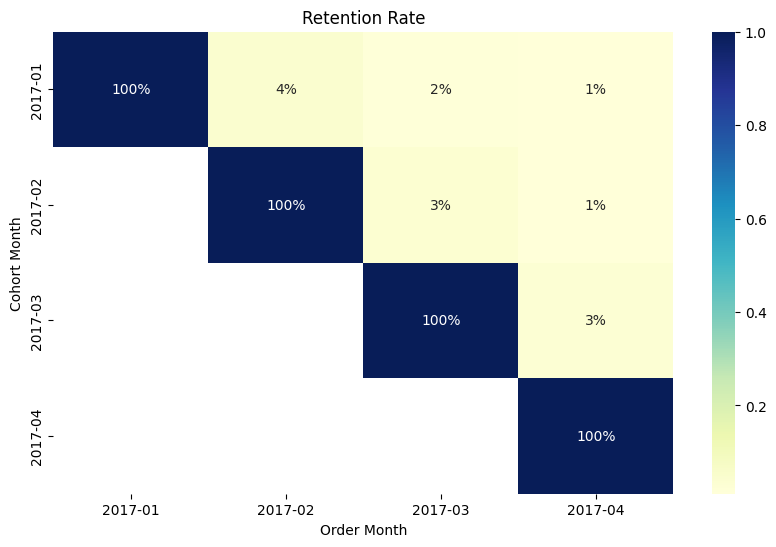

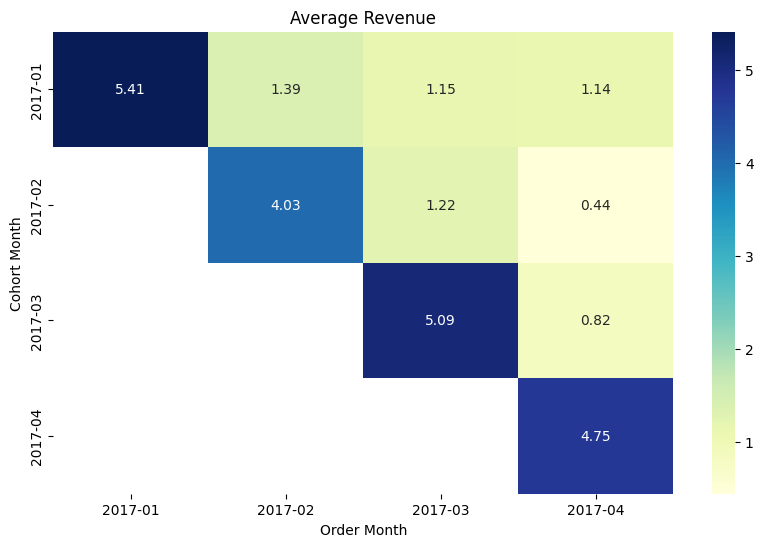

In [8]:

data['order_month'] = data['date'].dt.to_period('M')

data['cohort_month'] = data.groupby('id')['date'].transform('min').dt.to_period('M')

cohorts = data.groupby(['cohort_month', 'order_month']).agg({'id': 'nunique', 
                                                             'revenue': 'sum'})

cohorts.rename(columns={'id': 'cohort_size'}, inplace=True)


cohorts['retention_rate'] = cohorts['cohort_size'] / cohorts['cohort_size'].groupby('cohort_month').transform('first')
cohorts['average_revenue'] = cohorts['revenue'] /  cohorts['cohort_size'].groupby('cohort_month').transform('first')

cohorts = cohorts.unstack(level=1)


# Визуализация retention rate
plt.figure(figsize=(10, 6))
sns.heatmap(cohorts['retention_rate'], cmap='YlGnBu', annot=True, fmt='.0%')
plt.title('Retention Rate')
plt.xlabel('Order Month')
plt.ylabel('Cohort Month')
plt.show()

# Визуализация средней суммы покупок
plt.figure(figsize=(10, 6))
sns.heatmap(cohorts['average_revenue'], cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Revenue')
plt.xlabel('Order Month')
plt.ylabel('Cohort Month')
plt.show()

In [9]:
unique_counts = data.nunique()

result_df = pd.DataFrame({'column_name': unique_counts.index, 
                          'unique_count': unique_counts.values})

print(result_df.sort_values('unique_count'))


         column_name  unique_count
7             device             3
18      cohort_month             4
17       order_month             4
2           campaign             6
8          continent             6
4             medium             7
6            browser            29
15  product_category            69
1               date           120
13          quantity           137
5             source           150
9            country           192
16      product_name           475
10          pagePath           859
3            keyword          1025
14             price          1422
11     transactionId          3215
12           revenue          4615
0                 id        116844


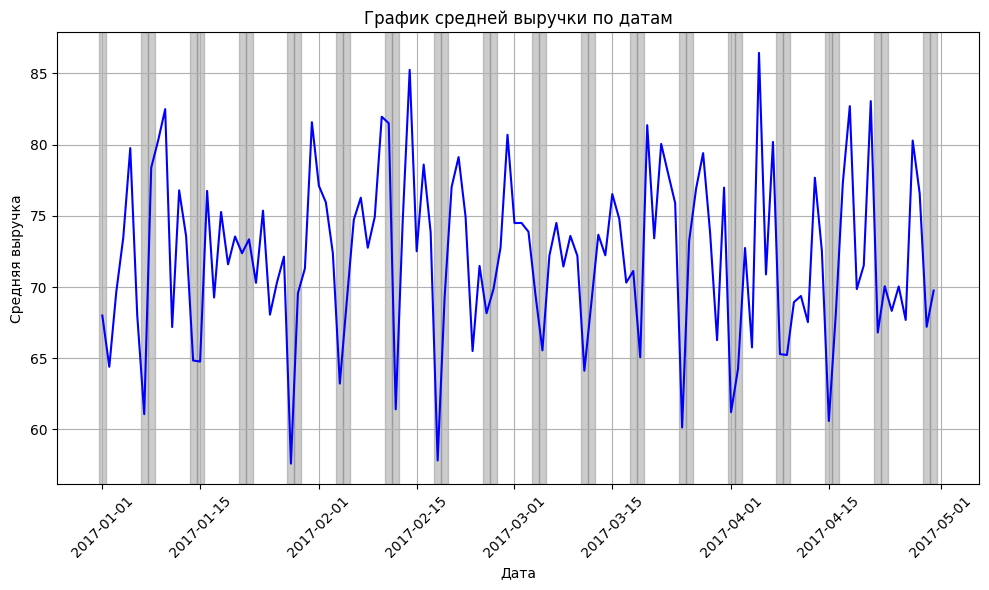

In [10]:
revenue_by_date = data.groupby('date')['revenue'].mean()


plt.figure(figsize=(10, 6))
plt.plot(revenue_by_date.index, 
         revenue_by_date.values, 
         linestyle='-', 
         color='b')
plt.xlabel('Дата')
plt.ylabel('Средняя выручка')
plt.title('График средней выручки по датам')
plt.xticks(rotation=45)

for date in revenue_by_date.index:
    if date.dayofweek >= 5:  
        plt.axvspan(date - pd.Timedelta(days=0.5), date + pd.Timedelta(days=0.5), color='gray', alpha=0.4)
        
plt.grid()
plt.tight_layout()
plt.show()
 

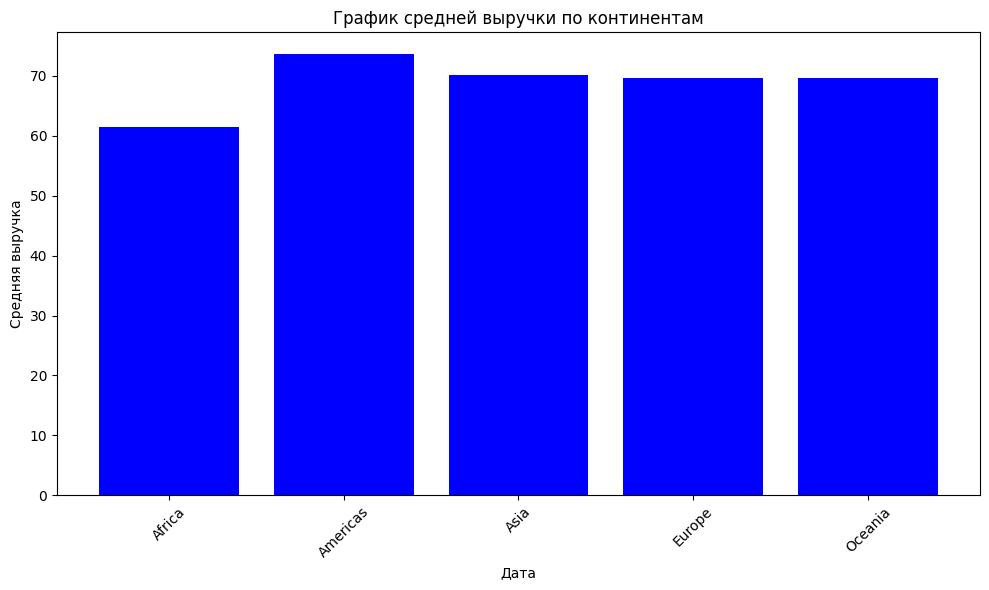

In [11]:
revenue_by_continent = data.groupby('continent')['revenue'].mean()


plt.figure(figsize=(10, 6))
plt.bar(revenue_by_continent.index, 
         revenue_by_continent.values, 
         color='b')
plt.xlabel('Дата')
plt.ylabel('Средняя выручка')
plt.title('График средней выручки по континентам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

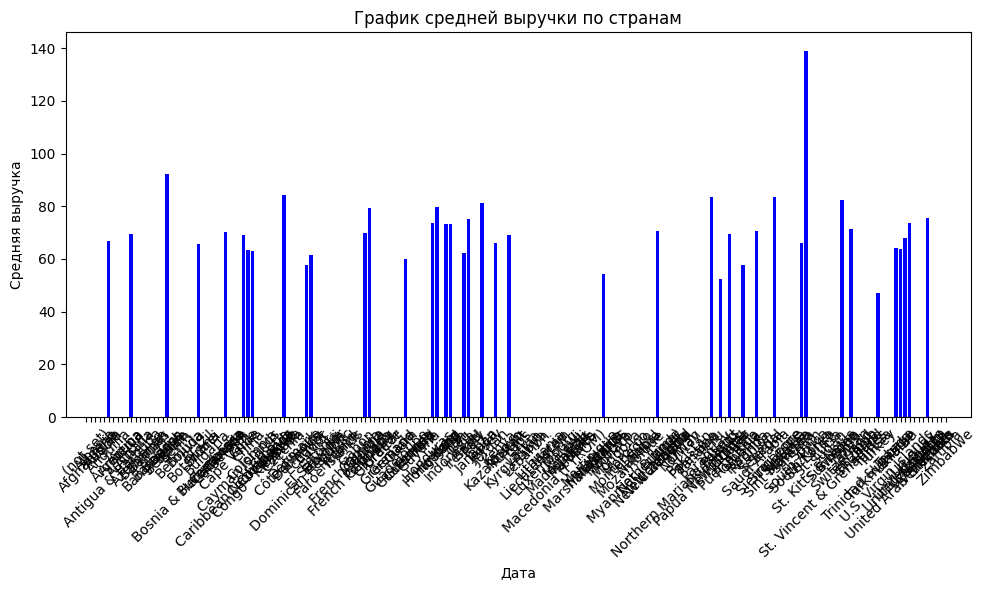

In [12]:
revenue_by_country = data.groupby('country')['revenue'].mean()

plt.figure(figsize=(10, 6))
plt.bar(revenue_by_country.index, 
         revenue_by_country.values, 
         color='b')
plt.xlabel('Дата')
plt.ylabel('Средняя выручка')
plt.title('График средней выручки по странам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

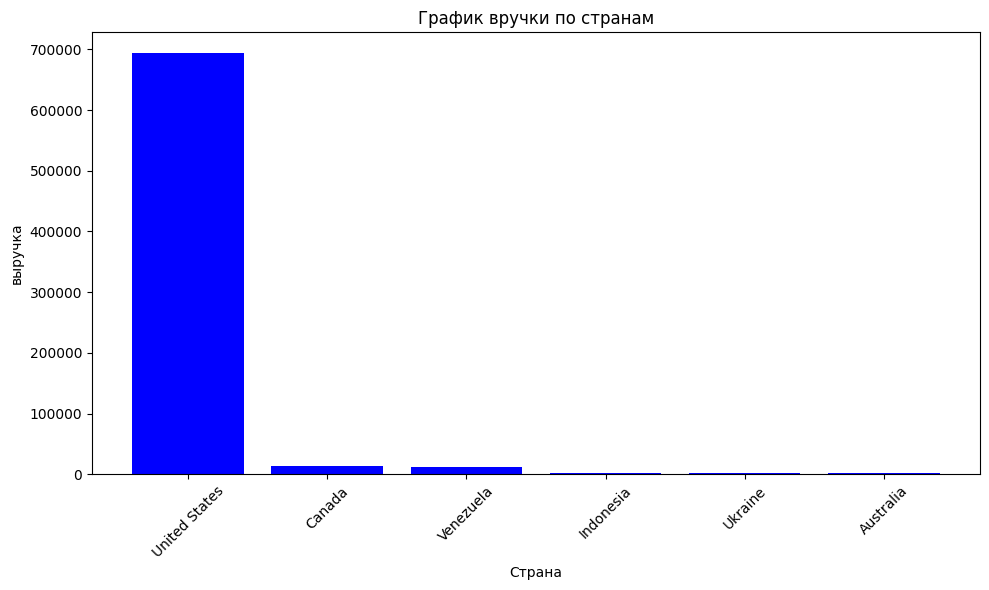

In [13]:
revenue_by_country_sum = data.groupby('country')['revenue'].sum().nlargest(6)

plt.figure(figsize=(10, 6))
plt.bar(revenue_by_country_sum.index, 
         revenue_by_country_sum.values, 
         color='b')
plt.xlabel('Страна')
plt.ylabel('выручка')
plt.title('График вручки по странам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

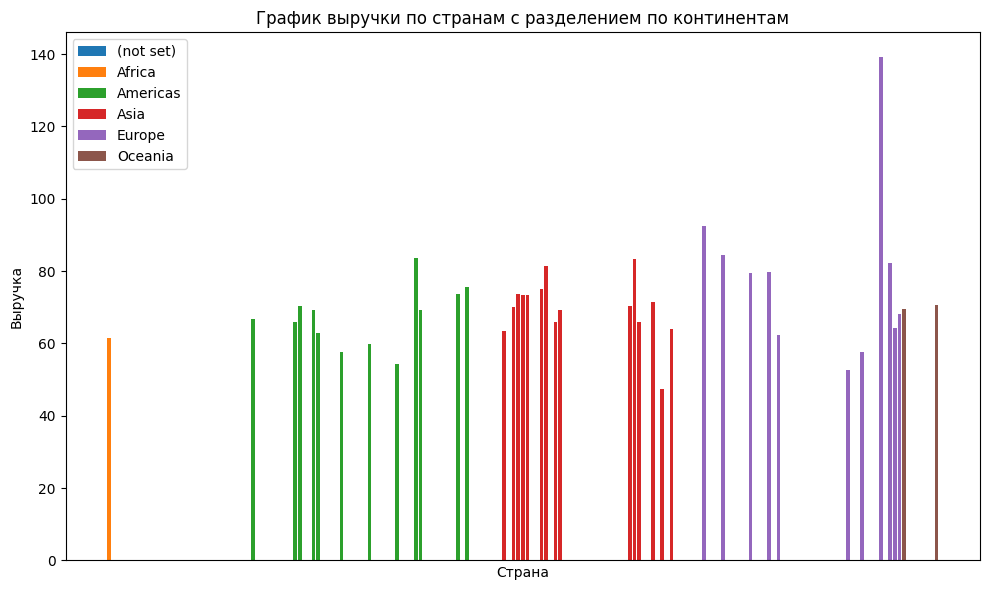

In [14]:
revenue_by_country_continent = data.groupby(['continent', 'country'])['revenue'].mean().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))

for continent, group_data in revenue_by_country_continent.groupby('continent'):
    ax.bar(group_data['country'], group_data['revenue'], label=continent)


ax.set_xlabel('Страна')
ax.set_ylabel('Выручка')
ax.set_title('График выручки по странам с разделением по континентам')
ax.legend(loc='upper left')
ax.set_xticks([])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






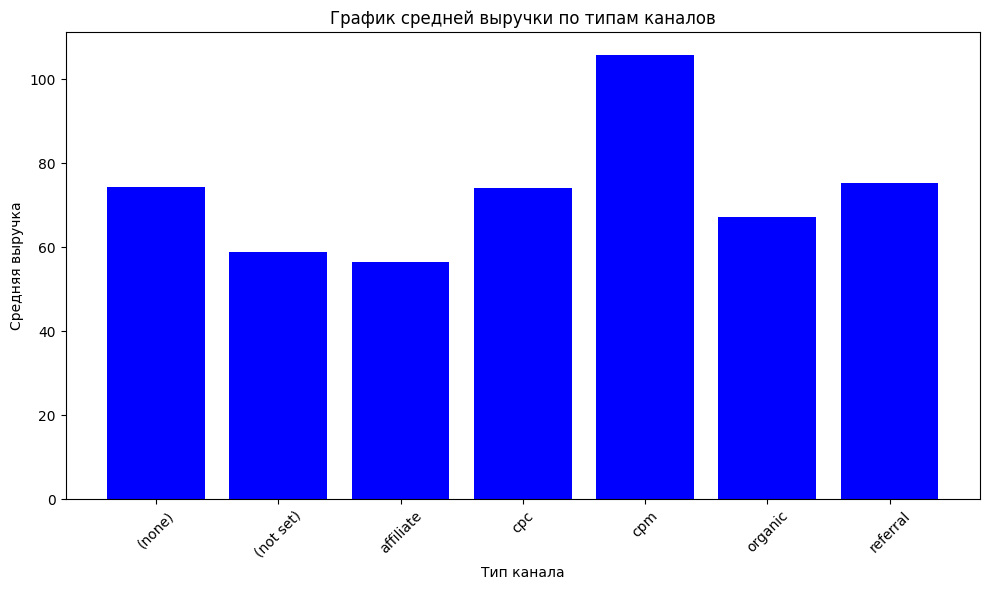

In [15]:
revenue_by_medium = data.groupby('medium')['revenue'].mean()


plt.figure(figsize=(10, 6))
plt.bar(revenue_by_medium.index, 
         revenue_by_medium.values, 
         color='b')
plt.xlabel('Тип канала')
plt.ylabel('Средняя выручка')
plt.title('График средней выручки по типам каналов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

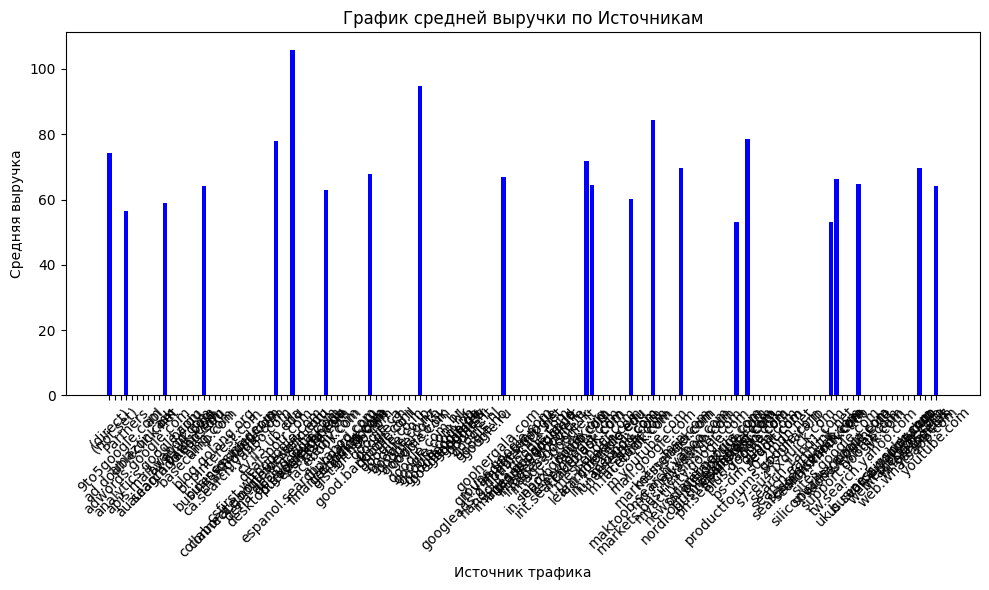

In [16]:
revenue_by_source = data.groupby('source')['revenue'].mean()


plt.figure(figsize=(10, 6))
plt.bar(revenue_by_source.index, 
         revenue_by_source.values, 
         color='b')
plt.xlabel('Источник трафика')
plt.ylabel('Средняя выручка')
plt.title('График средней выручки по Источникам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
revenue_by_source.sort_values(ascending=False).nlargest(22)

source
dfa                        105.920854
google.com                  94.925061
mail.google.com             84.358225
plus.google.com             78.414793
dealspotr.com               77.811689
(direct)                    74.314000
l.facebook.com              71.717822
mg.mail.yahoo.com           69.521737
yahoo                       69.513878
google                      67.901012
groups.google.com           66.790411
sites.google.com            66.321263
t.co                        64.725785
l.messenger.com             64.390081
youtube.com                 64.299773
bing                        64.292370
facebook.com                62.932147
m.facebook.com              60.023135
ask                         58.807511
Partners                    56.371526
phandroid.com               53.149688
siliconvalley.about.com     53.028495
Name: revenue, dtype: float64

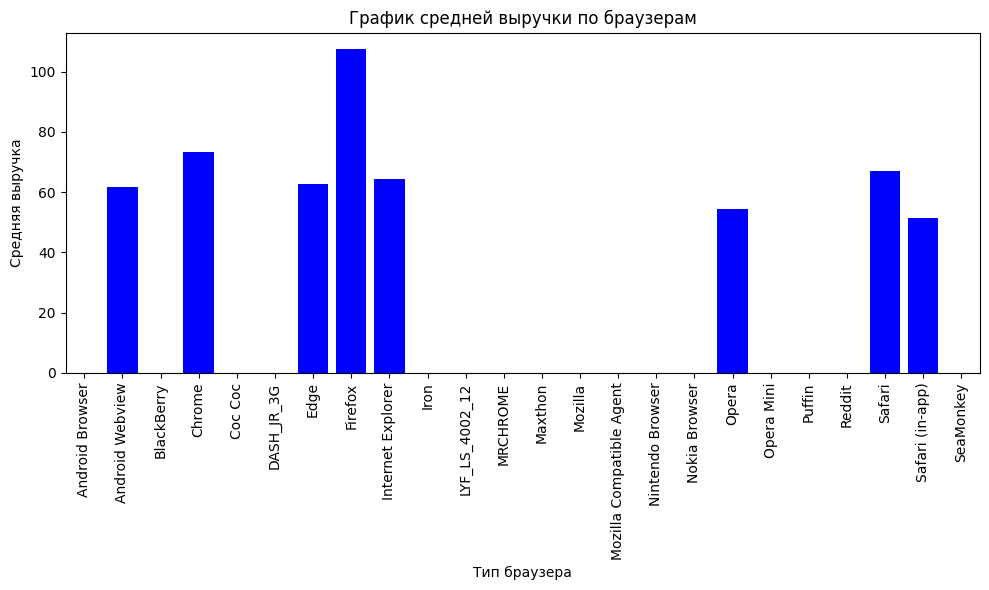

In [18]:
revenue_by_browser = data.groupby('browser')['revenue'].mean()


plt.figure(figsize=(10, 6))
plt.bar(revenue_by_browser.index, 
         revenue_by_browser.values, 
         color='b')
plt.xlabel('Тип браузера')
plt.ylabel('Средняя выручка')
plt.title('График средней выручки по браузерам')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

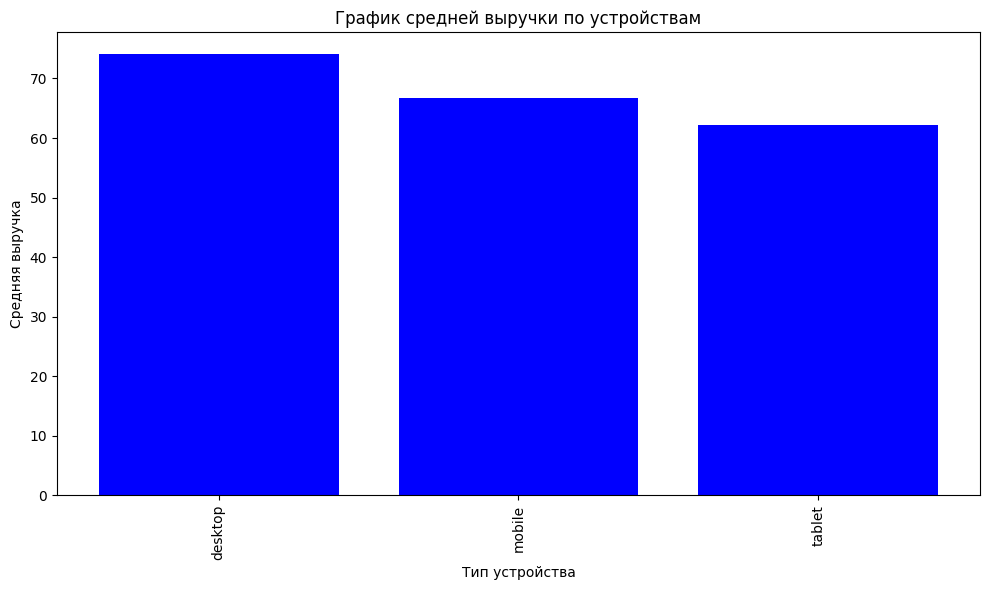

In [19]:
revenue_by_device = data.groupby('device')['revenue'].mean()


plt.figure(figsize=(10, 6))
plt.bar(revenue_by_device.index, 
         revenue_by_device.values, 
         color='b')
plt.xlabel('Тип устройства')
plt.ylabel('Средняя выручка')
plt.title('График средней выручки по устройствам')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
data

,id,date,campaign,keyword,medium,source,browser,device,continent,country,pagePath,transactionId,revenue,quantity,price,product_category,product_name,order_month,cohort_month
0,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,41.583189,(not set),Four Color Retractable Pen,2017-01,2017-01
1,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,31.543421,(not set),Maze Pen,2017-01,2017-01
2,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,33.437015,(not set),Retractable Ballpoint Pen Red,2017-01,2017-01
3,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,70.703606,(not set),20 oz Stainless Steel Insulated Tumbler,2017-01,2017-01
4,5648594193727334349,2017-01-29,(not set),NaN,(none),(direct),Chrome,mobile,Americas,United States,/asearch.html,NaN,NaN,NaN,37.558935,(not set),Google Ballpoint Pen Black,2017-01,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095679,8787132658319095913,2017-04-26,(not set),NaN,(none),(direct),Internet Explorer,tablet,Europe,Lithuania,/google+redesign/apparel,NaN,NaN,NaN,70.703606,Home/Apparel/,Google Wool Heather Cap Heather/Navy,2017-04,2017-04
1095680,8787132658319095913,2017-04-26,(not set),NaN,(none),(direct),Internet Explorer,tablet,Europe,Lithuania,/google+redesign/apparel,NaN,NaN,NaN,70.703606,Home/Apparel/,YouTube Wool Heather Cap Heather/Black,2017-04,2017-04
1095681,8787132658319095913,2017-04-26,(not set),NaN,(none),(direct),Internet Explorer,tablet,Europe,Lithuania,/google+redesign/apparel,NaN,NaN,NaN,70.703606,Home/Apparel/,Android Wool Heather Cap Heather/Black,2017-04,2017-04
1095682,8787132658319095913,2017-04-26,(not set),NaN,(none),(direct),Internet Explorer,tablet,Europe,Lithuania,/google+redesign/apparel,NaN,NaN,NaN,57.577052,Home/Apparel/,YouTube Twill Cap,2017-04,2017-04


In [25]:
data_to_xls = data[['date',
                    'country',
                    'campaign',
                    'medium', 
                    'browser', 
                    'revenue',
                    'source']]

data_to_xls #.to_csv('/Users/yanaprynik/Desktop/google_data.csv')